# Ordinary Least-Squares Estimation

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

1. Proofs involving ordinary least squares https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares
2. OLS in Matrix Form https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf 
3. Least Squares Estimation https://stat.ethz.ch/~geer/bsa199_o.pdf 
4. Simple Linear Regression Analysis http://home.iitk.ac.in/~shalab/econometrics/Chapter2-Econometrics-SimpleLinearRegressionAnalysis.pdf

In [2]:
μ, σ, d = 1, 3, 300
x = σ * np.random.randn(d) + μ
e = 0.8 * np.random.randn(d)
y = 1 + 0.2 * x + e
X = pd.DataFrame({'x': x, 'y': y})

- Let's assume that the independent variables are $\vec{x}=[x_1,x_2,...,x_d]$ where *d* is the dimensionality of the data, $\vec{x}$ is a single example from the data, and $x_j$ is the example's $j^{th}$ attribute value. 

- If the Models parameters are $\vec{w}=[w_0,w_1,w_2,...,w_d]$, then the models prediction would be $\hat{y}\approx w_0 + \sum_{j=1}^d w_j x_j.$ If we prepend a $1$ to the independent variables such that $\vec{x}=[1,x_1,x_2,...,x_d]$ then $\hat{y}\approx w_0 + \sum_{j=1}^d w_j x_j = \vec{x} \cdot \vec{w},$ the dot product of the independent variables row vector and the parameters (weights) column vector. In least-squares estimation, we find the parameter values, $\vec{w}$, that minimize the sum of the mean squared loss over all *n* training examples:

$$\vec{w} = \text{arg min}_\vec{w} \sum_{j=1}^n (\vec{x}_i \cdot \vec{w} - y_i )^2 $$

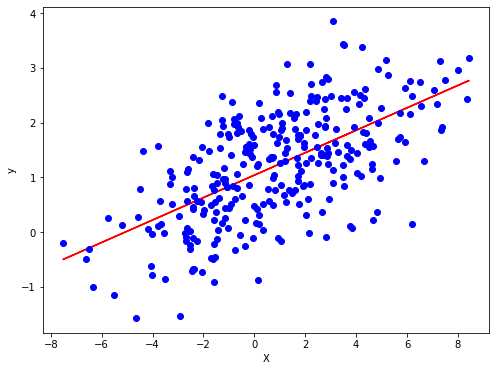

In [3]:
x̄, ȳ = np.mean(x), np.mean(y)
X['xycov'] = (X['x'] - x̄) * (X['y'] - ȳ)
X['xvar'] = (X['x'] - x̄)**2
coef = X['xycov'].sum() / X['xvar'].sum()
intercept = ȳ - (coef * x̄)
Y = intercept + coef * x
plt.figure(figsize=(8, 6))
plt.plot(x, Y, color='red'), plt.plot(x, y, 'bo')
plt.xlabel('X'), plt.ylabel('y')
plt.show()

- Now putting the independent and dependent variables in matrices **X** and **Y** respectively, the loss function L, given a dataset **D** and parameters $\vec{w}$, can be rewritten as:

$L(\matrix{D},\vec{w})= \| \matrix{X}\vec{w}-\matrix{Y} \|^2 =(\matrix{X}\vec{w}-\matrix{Y})^T(\matrix{X}\vec{w}-\vec{Y}) = \vec{w}^T\matrix{X}^T\matrix{X}\vec{w} -\matrix{Y}^T \matrix{X}\vec{w} - \vec{w}^T\matrix{X}^T\matrix{Y} + \matrix{Y}^T\matrix{Y}$

- Since the loss is a convex quadratic function, $\|\matrix{X}\vec{w} - \matrix{Y} \|^2$
, the optimal
solution lies at the point its gradient is zero. The gradient of the loss
function with respect to w is:

$\frac{\partial L(\matrix{D},\vec{w})}{\partial \vec{w}}=\frac{\partial}{\partial \vec{w}}(\vec{w}^T\matrix{X}^T\matrix{X}\vec{w} -\matrix{Y}^T \matrix{X}\vec{w} - \vec{w}^T\matrix{X}^T\matrix{Y} + \matrix{Y}^T\matrix{Y})=2\vec{w}^T\matrix{X}^T\matrix{X}-2\matrix{Y}^T\matrix{X}=0$

- Setting the gradient to zero produces the value of $\vec{w}$ that leads to the least squared error:

$2\vec{w}^T\matrix{X}^T\matrix{X}-2\matrix{Y}^T\matrix{X}=0$

$\vec{w}^T\matrix{X}^T\matrix{X}=\matrix{Y}^T\matrix{X}$

$\matrix{X}^T\matrix{X}\vec{w}=\matrix{X}^T\matrix{Y}$

$\vec{w}=(\matrix{X}^T\matrix{X})^{-1}\matrix{X}^T\matrix{Y}$

- This is the closed form solution for $\vec{w}$. Write and execute a code for calculating w, print $\vec{w}$ and compare it to the intercept and coefficient values you output earlier.

In [4]:
X = X.to_numpy()

In [5]:
w = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y))

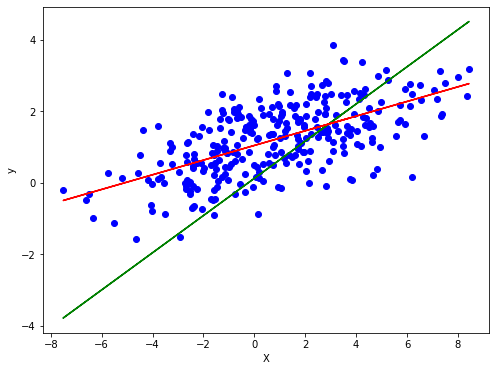

In [6]:
W = w[0] + w[1] * x
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo'), plt.plot(x, W, color='green'), plt.plot(x, Y, color='red')
plt.xlabel('X'), plt.ylabel('y')
plt.show()

In [7]:
print(f"intercept: {intercept}\ncoef: {coef}")
print("------------------------------------------")
print(f"intercept: {w[0]}\ncoef: {w[1]}")

intercept: 1.0395162615174542
coef: 0.20502124228824492
------------------------------------------
intercept: 0.11905898760263595
coef: 0.5201357586774191


### RMSE

In [8]:
np.sqrt(np.mean(np.matmul((np.matmul(X,w) - y).T, (np.matmul(X,w) - y))))

9.767986291017053